# Credit Score Prediction – EDA & Machine Learning
Author: Ramashish Sahani  

This notebook covers:  
1. Data Cleaning & Quality Check  
2. Univariate Analysis  
3. Bivariate Analysis  
4. Feature Engineering  
5. Machine Learning Model  
6. Evaluation & Insights  

The goal is to **analyze customer financial behavior** and **predict Credit Score** (Good / Standard / Poor).  


### 🔹 Data Quality & Cleaning Questions
- What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  
- Are there **duplicate SSNs or Names** (possible data quality issue)?  
- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  
- Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  
- Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`?  
- Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  

---

### 🔹 Univariate Analysis (Single Feature Insights)
- What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  
- What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  
- How is **Annual_Income** distributed? Is it skewed?  
- What is the most common **Occupation** type among applicants?  
- What are the most frequent loan types in **Type_of_Loan**?  
- How does **Credit_History_Age** vary across customers?  

---

### 🔹 Bivariate & Relationship Questions
- Does higher **Annual_Income** correlate with better `Credit_Score`?  
- How does **Monthly_Inhand_Salary** affect `Outstanding_Debt`?  
- Do people with more **Num_Bank_Accounts** have better or worse `Credit_Score`?  
- Is there a relationship between **Num_Credit_Card** and `Credit_Utilization_Ratio`?  
- Does **Num_of_Delayed_Payment** strongly correlate with poor credit score?  
- How do **Interest_Rate** and **Total_EMI_per_month** affect `Monthly_Balance`?  
- Is there a difference in credit score distribution across different **Credit_Mix** types?  
- Does **Payment_Behaviour** indicate future default risk?  


### 🔹 Time-based & Behavioral Analysis
- Are there seasonal patterns in **Month** (e.g., more defaults in festive/holiday seasons)?  
- How does **Changed_Credit_Limit** over time affect customer’s creditworthiness?  
- Do frequent **Num_Credit_Inquiries** indicate lower credit scores?  
- Are customers who *"pay only minimum"* (**Payment_of_Min_Amount = Yes**) more likely to have bad credit?  

---

### 🔹 Risk Indicators
- What is the average **Credit_Utilization_Ratio** for each credit score category?  
- How much **Outstanding_Debt** do defaulters usually carry compared to good scorers?  
- Are people with multiple loans (**Num_of_Loan**) more likely to have bad credit?  
- Is high **Num_of_Delayed_Payment** a strong predictor of poor credit score?  
- Is there a threshold in **Credit_History_Age** beyond which credit risk reduces?  

---

### 🔹 Feature Engineering Opportunities
- Can we derive **Debt-to-Income Ratio** = `Outstanding_Debt / Annual_Income`?  
- Can we compute **EMI-to-Income Ratio** = `Total_EMI_per_month / Monthly_Inhand_Salary`?  
- Can we create a **Savings Ratio** = `Monthly_Balance / Monthly_Inhand_Salary`?  
- Can we create a flag for **High Credit Utilization** (e.g., >70%)?  

---

### 🔹 Modeling Preparation Questions
- Which features are most correlated with **Credit_Score**?  
- Do categorical variables need encoding (Label Encoding, One-Hot Encoding)?  
- Is the dataset imbalanced, requiring **SMOTE/oversampling** before training?  
- Which features should be **scaled/normalized** before applying ML?  
- Which features have **multicollinearity** and may need removal (e.g., VIF test)?  
- Should **Credit_Score** be treated as **classification** (Good/Standard/Poor) or **regression** (continuous score prediction)?  

---

### 🔹 ML-Specific Questions
- What is the **baseline accuracy** if we predict the most frequent `Credit_Score`?  
- Which model works better here: **Logistic Regression, Random Forest, XGBoost, or LightGBM**?  
- Which features have the **highest importance** in predicting `Credit_Score`?  
- Can **clustering (KMeans)** segment customers into financial behavior groups (independent of score)?  
- How does model performance change when we include vs. exclude derived features (**ratios**)?  
- How well does the model generalize on **test data (cross-validation scores)**?  


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

<p> We are going to use credit dataset, we will perform exploratory data Analysis and then we will create Machine Learning model to prodict Credit Score.</p>

Loading dataset

In [3]:
ls_train = pd.read_csv('train.csv',low_memory=False)
ls_test = pd.read_csv('test.csv')

In [4]:
ls_train.head(3)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [5]:
ls_test.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997


We are going to marge train and test data

In [44]:
ls_df = pd.concat([ls_train,ls_test],axis=0)

### 🔹 Data Quality & Cleaning Questions
- What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  
- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  
- Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  
- Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`?  
- Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  

In [7]:
ls_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [45]:
ls_df = ls_df.sample(frac=1, random_state=42).reset_index(drop=True)

Lets remove ID and Customer_ID as they are not serviing any purpose

In [46]:
ls_df.drop(columns=['ID','Customer_ID','Name','SSN'],inplace=True,)

In [47]:
ls_df.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,March,31_,Musician,12524.625,NaN,5,3,13,0,NaN,...,Standard,689.18,34.558473,5 Years and 6 Months,NM,0.000000,80.29001728923474,Low_spent_Medium_value_payments,289.48185771076527,Standard
1,March,42,Engineer,83245.14,7037.095000,2,3,8,1,Student Loan,...,Good,1229.4,29.149179,20 Years and 7 Months,No,67.692175,77.79720292695758,High_spent_Large_value_payments,798.2201220631251,Standard
2,September,35,Accountant,8940.905,985.556904,7,9,18,6,"Home Equity Loan, Home Equity Loan, Student Lo...",...,Bad,2558.29,36.265011,4 Years and 9 Months,Yes,40.097649,90.74562811468624,Low_spent_Small_value_payments,262.68277665862485,NaN
3,October,27,Architect,19504.32,1554.360000,7,8,1971,2,"Credit-Builder Loan, and Student Loan",...,Standard,1882.8,28.603402,16 Years and 0 Months,Yes,17.310437,166.9142013244005,Low_spent_Small_value_payments,261.21136173324834,NaN
4,October,19,Accountant,160346.44,NaN,2,5,8,4,"Credit-Builder Loan, Debt Consolidation Loan, ...",...,Good,630.62,32.260522,22 Years and 1 Months,No,297.893363,994.0617327378767,Low_spent_Small_value_payments,359.1652380031295,NaN


In [16]:
ls_df.shape

(150000, 25)

In [26]:
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     150000 non-null  object 
 1   Name                      135000 non-null  object 
 2   Age                       150000 non-null  object 
 3   SSN                       150000 non-null  object 
 4   Occupation                150000 non-null  object 
 5   Annual_Income             150000 non-null  object 
 6   Monthly_Inhand_Salary     127500 non-null  float64
 7   Num_Bank_Accounts         150000 non-null  int64  
 8   Num_Credit_Card           150000 non-null  int64  
 9   Interest_Rate             150000 non-null  int64  
 10  Num_of_Loan               150000 non-null  object 
 11  Type_of_Loan              132888 non-null  object 
 12  Delay_from_due_date       150000 non-null  int64  
 13  Num_of_Delayed_Payment    139500 non-null  o

In [48]:
object_to_convert = ["Annual_Income" , "Age", "Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Monthly_Balance","Amount_invested_monthly"]

In [49]:
ls_df.loc[0:6,object_to_convert]

,Annual_Income,Age,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Monthly_Balance,Amount_invested_monthly
0,12524.625,31_,0,9,_,689.18,289.48185771076527,80.29001728923474
1,83245.14,42,1,5,2.47,1229.4,798.2201220631251,77.79720292695758
2,8940.905,35,6,23,16.84,2558.29,262.68277665862485,90.74562811468624
3,19504.32,27,2,11,12.64,1882.8,261.21136173324834,166.9142013244005
4,160346.44,19,4,4,5.41,630.62,359.1652380031295,994.0617327378767
5,67255.6,35,4,8,2.64,122.5,524.9184392591194,165.87398249025318
6,66061.04_,20,3,25,4.92,1801.38,657.5579222784229,67.84855807494021


In [50]:
for col in object_to_convert:
    ls_df[col] = ls_df[col].replace(r'_',0)

In [51]:
ls_df.loc[0:6,object_to_convert]

,Annual_Income,Age,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Monthly_Balance,Amount_invested_monthly
0,12524.625,31_,0,9,0,689.18,289.48185771076527,80.29001728923474
1,83245.14,42,1,5,2.47,1229.4,798.2201220631251,77.79720292695758
2,8940.905,35,6,23,16.84,2558.29,262.68277665862485,90.74562811468624
3,19504.32,27,2,11,12.64,1882.8,261.21136173324834,166.9142013244005
4,160346.44,19,4,4,5.41,630.62,359.1652380031295,994.0617327378767
5,67255.6,35,4,8,2.64,122.5,524.9184392591194,165.87398249025318
6,66061.04_,20,3,25,4.92,1801.38,657.5579222784229,67.84855807494021


We can see still there are '_' in Annual_Income and Age, let clean it that also

In [52]:
for col in object_to_convert:
    ls_df[col] = ls_df[col].astype(str).apply(lambda x : x.rstrip(r'_'))

ls_df.loc[0:6,object_to_convert]

,Annual_Income,Age,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Monthly_Balance,Amount_invested_monthly
0,12524.625,31,0,9,0,689.18,289.48185771076527,80.29001728923474
1,83245.14,42,1,5,2.47,1229.4,798.2201220631251,77.79720292695758
2,8940.905,35,6,23,16.84,2558.29,262.68277665862485,90.74562811468624
3,19504.32,27,2,11,12.64,1882.8,261.21136173324834,166.9142013244005
4,160346.44,19,4,4,5.41,630.62,359.1652380031295,994.0617327378767
5,67255.6,35,4,8,2.64,122.5,524.9184392591194,165.87398249025318
6,66061.04,20,3,25,4.92,1801.38,657.5579222784229,67.84855807494021


Converting object to numeric value

In [53]:
ls_df[object_to_convert] = ls_df[object_to_convert].apply(pd.to_numeric, errors='coerce')

In [54]:

ls_df.loc[0:6,object_to_convert]

,Annual_Income,Age,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Monthly_Balance,Amount_invested_monthly
0,12524.625,31,0,9.0,0.00,689.18,289.481858,80.290017
1,83245.140,42,1,5.0,2.47,1229.40,798.220122,77.797203
2,8940.905,35,6,23.0,16.84,2558.29,262.682777,90.745628
3,19504.320,27,2,11.0,12.64,1882.80,261.211362,166.914201
4,160346.440,19,4,4.0,5.41,630.62,359.165238,994.061733
5,67255.600,35,4,8.0,2.64,122.50,524.918439,165.873982
6,66061.040,20,3,25.0,4.92,1801.38,657.557922,67.848558


In [55]:
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     150000 non-null  object 
 1   Age                       150000 non-null  int64  
 2   Occupation                150000 non-null  object 
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     127500 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  int64  
 6   Num_Credit_Card           150000 non-null  int64  
 7   Interest_Rate             150000 non-null  int64  
 8   Num_of_Loan               150000 non-null  int64  
 9   Type_of_Loan              132888 non-null  object 
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    139500 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      147000 non-null  f

In [128]:
ls_df.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,March,31,297-60-0692,Musician,12524.625,NaN,5,3,13,0,...,Standard,689.18,34.558473,5 Years and 6 Months,NM,0.000000,80.290017,Low_spent_Medium_value_payments,289.481858,Standard
1,March,42,333-29-1726,Engineer,83245.140,7037.095000,2,3,8,1,...,Good,1229.40,29.149179,20 Years and 7 Months,No,67.692175,77.797203,High_spent_Large_value_payments,798.220122,Standard
2,September,35,004-06-1187,Accountant,8940.905,985.556904,7,9,18,6,...,Bad,2558.29,36.265011,4 Years and 9 Months,Yes,40.097649,90.745628,Low_spent_Small_value_payments,262.682777,NaN
3,October,27,627-39-8653,Architect,19504.320,1554.360000,7,8,1971,2,...,Standard,1882.80,28.603402,16 Years and 0 Months,Yes,17.310437,166.914201,Low_spent_Small_value_payments,261.211362,NaN
4,October,19,842-07-2442,Accountant,160346.440,NaN,2,5,8,4,...,Good,630.62,32.260522,22 Years and 1 Months,No,297.893363,994.061733,Low_spent_Small_value_payments,359.165238,NaN


In [56]:
object_columns = ls_df.select_dtypes(include=['object']).columns.to_list()

In [57]:
ls_df.loc[0:5,object_columns]

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,March,Musician,NaN,Standard,5 Years and 6 Months,NM,Low_spent_Medium_value_payments,Standard
1,March,Engineer,Student Loan,Good,20 Years and 7 Months,No,High_spent_Large_value_payments,Standard
2,September,Accountant,"Home Equity Loan, Home Equity Loan, Student Lo...",Bad,4 Years and 9 Months,Yes,Low_spent_Small_value_payments,NaN
3,October,Architect,"Credit-Builder Loan, and Student Loan",Standard,16 Years and 0 Months,Yes,Low_spent_Small_value_payments,NaN
4,October,Accountant,"Credit-Builder Loan, Debt Consolidation Loan, ...",Good,22 Years and 1 Months,No,Low_spent_Small_value_payments,NaN
5,March,Developer,"Payday Loan, Student Loan, Mortgage Loan, and ...",Good,22 Years and 4 Months,No,High_spent_Medium_value_payments,Standard


 - What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  

In [58]:
round(ls_df.isnull().sum()*100/ls_df.shape[0],3)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.820
Payment_Behaviour            0.000
Monthly_Balance              1.185
Credit_Score                33.333
dtype: float64

In [65]:
ls_df_droped = ls_df.dropna(subset=['Credit_Score','Type_of_Loan','Credit_History_Age'])

In [66]:
round(ls_df_droped.isnull().sum()*100/ls_df.shape[0],3)

Month                       0.000
Age                         0.000
Occupation                  0.000
Annual_Income               0.000
Monthly_Inhand_Salary       8.038
Num_Bank_Accounts           0.000
Num_Credit_Card             0.000
Interest_Rate               0.000
Num_of_Loan                 0.000
Type_of_Loan                0.000
Delay_from_due_date         0.000
Num_of_Delayed_Payment      3.723
Changed_Credit_Limit        0.000
Num_Credit_Inquiries        1.057
Credit_Mix                  0.000
Outstanding_Debt            0.000
Credit_Utilization_Ratio    0.000
Credit_History_Age          0.000
Payment_of_Min_Amount       0.000
Total_EMI_per_month         0.000
Amount_invested_monthly     4.751
Payment_Behaviour           0.000
Monthly_Balance             0.710
Credit_Score                0.000
dtype: float64

In [67]:
ls_df_droped.shape

(80557, 24)

In [61]:
null_columns = ls_df_droped.columns[ls_df_droped.isnull().any()].to_list()

In [23]:
null_columns

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [62]:
ls_df_droped[null_columns].head()

,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance
1,7037.095000,5.0,4.0,77.797203,798.220122
5,5745.633333,8.0,3.0,165.873982,524.918439
6,NaN,25.0,17.0,67.848558,657.557922
7,2040.790000,22.0,7.0,NaN,223.659922
8,8769.713333,22.0,1.0,242.842618,721.398116


In [69]:

for col in null_columns:
   ls_df_droped[col] = ls_df_droped[col].fillna(ls_df_droped[col].mean())

C:\Users\ramas\AppData\Local\Temp\ipykernel_23016\3682533636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped[col] = ls_df_droped[col].fillna(ls_df_droped[col].mean())


In [70]:
ls_df_droped.shape

(80557, 24)

In [71]:
ls_df_droped.columns[ls_df_droped.isnull().any()].to_list()

[]

In [72]:
object_columns = ls_df_droped.select_dtypes(include=['object']).columns.tolist()
object_columns

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [38]:
ls_df_droped.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,March,42,333-29-1726,Engineer,83245.14,7037.095000,2,3,8,1,...,Good,1229.40,29.149179,20 Years and 7 Months,No,67.692175,77.797203,High_spent_Large_value_payments,798.220122,Standard
5,March,35,047-64-4774,Developer,67255.60,5745.633333,4,6,4,4,...,Good,122.50,32.252875,22 Years and 4 Months,No,133.770912,165.873982,High_spent_Medium_value_payments,524.918439,Standard
6,July,20,568-75-9435,Teacher,66061.04,4070.146692,6,5,22,3,...,_,1801.38,27.561613,12 Years and 8 Months,Yes,100.802186,67.848558,High_spent_Medium_value_payments,657.557922,Poor
7,June,26,054-60-4996,Architect,26649.48,2040.790000,4,6,4,4,...,Standard,496.59,26.255375,24 Years and 0 Months,No,73.109453,190.494056,Low_spent_Small_value_payments,223.659922,Poor
8,March,20,012-42-3003,_______,104816.56,8769.713333,3,7,13,3,...,Standard,1220.07,41.231847,30 Years and 0 Months,Yes,192.730600,242.842618,Low_spent_Medium_value_payments,721.398116,Standard


In [73]:
ls_df_droped[object_columns].head(5)

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
1,March,Engineer,Student Loan,Good,20 Years and 7 Months,No,High_spent_Large_value_payments,Standard
5,March,Developer,"Payday Loan, Student Loan, Mortgage Loan, and ...",Good,22 Years and 4 Months,No,High_spent_Medium_value_payments,Standard
6,July,Teacher,"Personal Loan, Auto Loan, and Mortgage Loan",_,12 Years and 8 Months,Yes,High_spent_Medium_value_payments,Poor
7,June,Architect,"Mortgage Loan, Auto Loan, Personal Loan, and S...",Standard,24 Years and 0 Months,No,Low_spent_Small_value_payments,Poor
8,March,_______,"Personal Loan, Student Loan, and Not Specified",Standard,30 Years and 0 Months,Yes,Low_spent_Medium_value_payments,Standard


In [74]:
for col in object_columns[6:7]:
    print(col)
    print(ls_df_droped[col].value_counts().sort_values(ascending=False))

Payment_Behaviour
Low_spent_Small_value_payments      21037
High_spent_Medium_value_payments    14010
Low_spent_Medium_value_payments     11121
High_spent_Large_value_payments     10779
High_spent_Small_value_payments      9136
Low_spent_Large_value_payments       8387
!@9#%8                               6087
Name: Payment_Behaviour, dtype: int64


In [76]:
ls_df_droped['Occupation'] = ls_df_droped['Occupation'].replace('_______',np.nan)
ls_df_droped['Credit_Mix'] = ls_df_droped['Credit_Mix'].replace('_',np.nan)
ls_df_droped['Payment_Behaviour'] = ls_df_droped['Payment_Behaviour'].replace('!@9#%8', np.nan) 

C:\Users\ramas\AppData\Local\Temp\ipykernel_23016\3189817657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped['Occupation'] = ls_df_droped['Occupation'].replace('_______',np.nan)
C:\Users\ramas\AppData\Local\Temp\ipykernel_23016\3189817657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped['Credit_Mix'] = ls_df_droped['Credit_Mix'].replace('_',np.nan)
C:\Users\ramas\AppData\Local\Temp\ipykernel_23016\3189817657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [77]:
ls_df_droped.shape

(80557, 24)

In [79]:
round(ls_df_droped.isnull().sum()*100/ls_df.shape[0],3)

Month                        0.000
Age                          0.000
Occupation                   3.766
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                 0.000
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                  10.772
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            4.058
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

In [82]:
ls_df_droped_new = ls_df_droped.dropna()

In [84]:
round(ls_df_droped_new.isnull().sum()*100/ls_df.shape[0],3)

Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [85]:
ls_df_droped_new.shape

(55347, 24)

- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  

In [91]:
ls_df_droped_new[(ls_df_droped_new['Age'] < 18) | (ls_df_droped_new['Age'] > 100)]['Age'].value_counts()

 15      929
 17      911
 16      910
 14      749
-500     483
        ... 
 5154      1
 5046      1
 3365      1
 3564      1
 7131      1
Name: Age, Length: 963, dtype: int64

We can see that 963 row are there where age does not fall in range range of 18 to 100, let remove it from our dataset

In [92]:
ls_df_droped_new = ls_df_droped_new[~((ls_df_droped_new['Age'] < 18) | (ls_df_droped_new['Age'] > 100))]

In [93]:
ls_df_droped_new.shape

(50333, 24)

In [94]:
ls_df_droped_new.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

After cleaning all the data we we got 55347 row in our dataset, sets save the dataset

In [ ]:
ls_df_droped_new.to_csv("credit_score_cleaned.csv")

In [95]:
numeric_columns = [col for col in ls_df_droped_new.columns.to_list() if col not in object_columns]


In [97]:
 object_columns

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [96]:
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [99]:
len(numeric_columns)

16

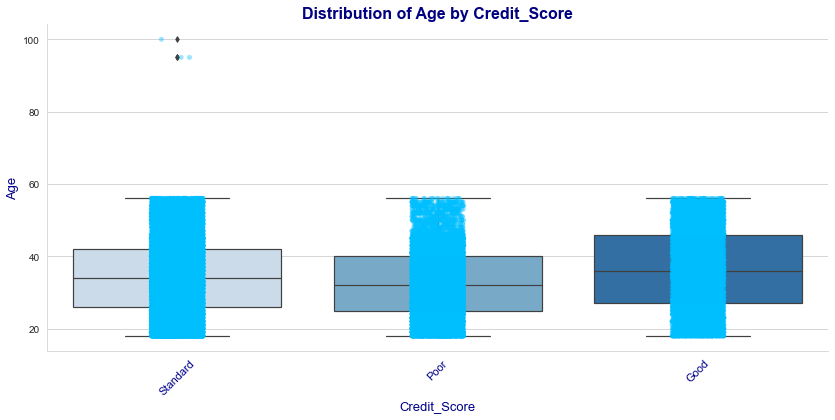

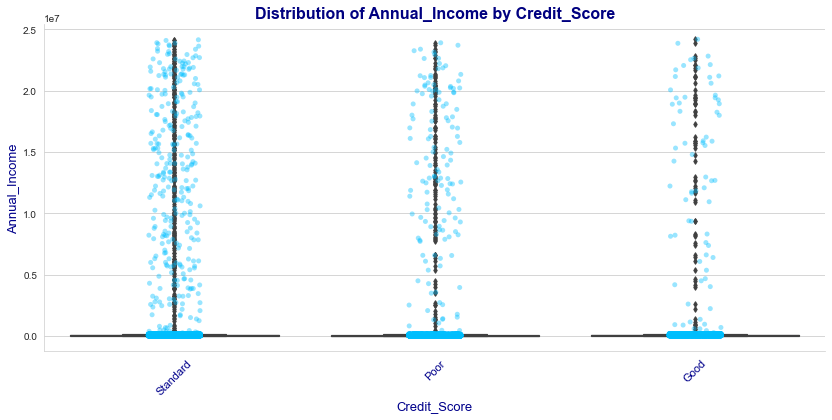

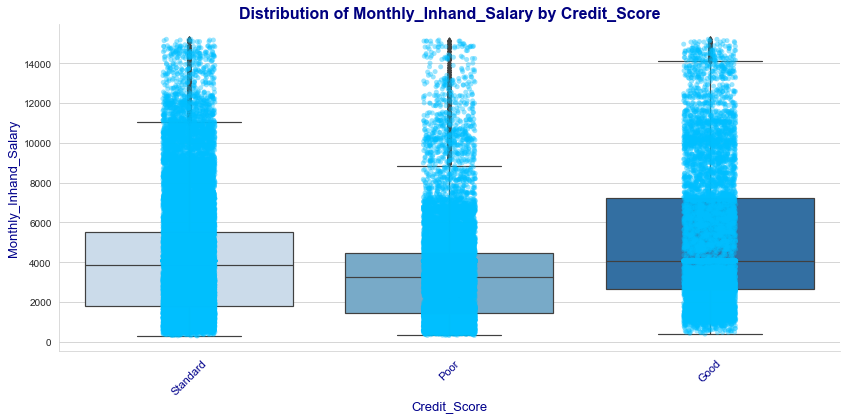

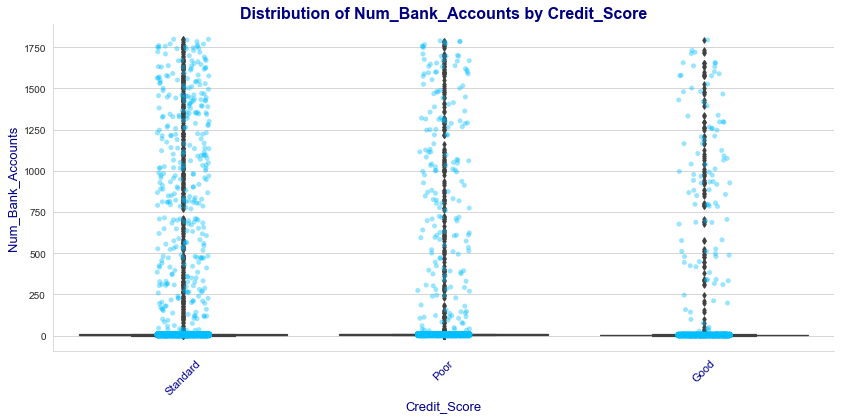

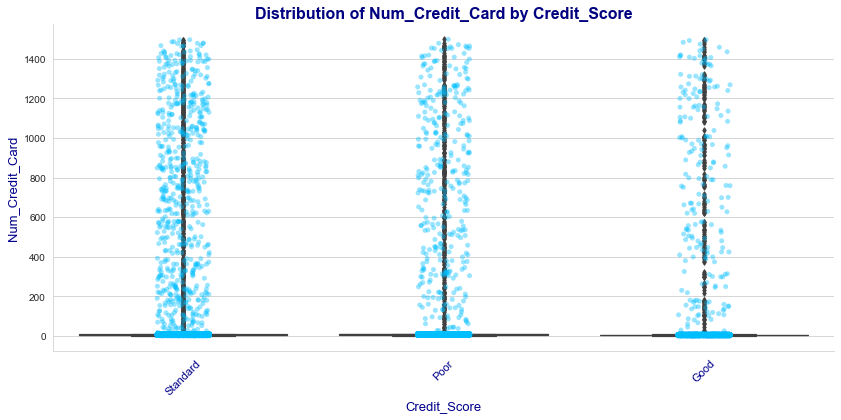

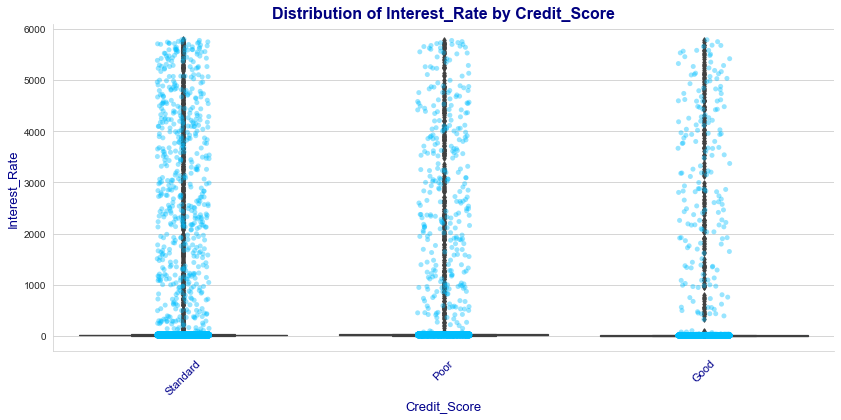

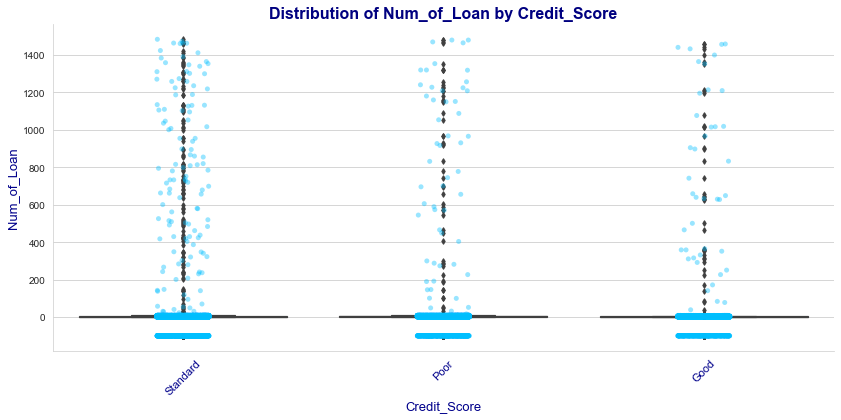

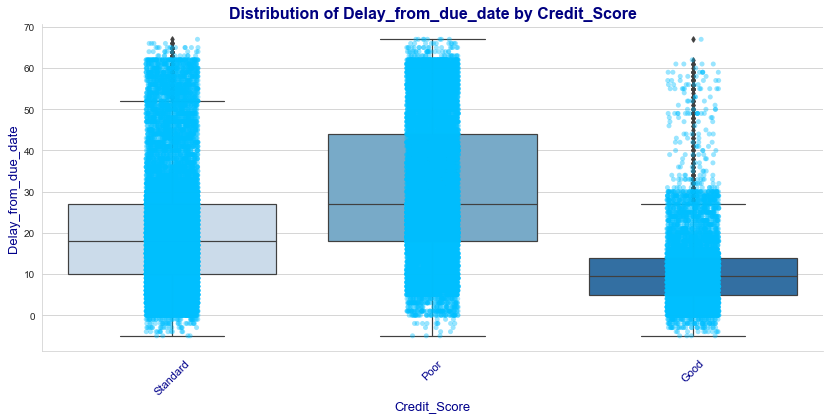

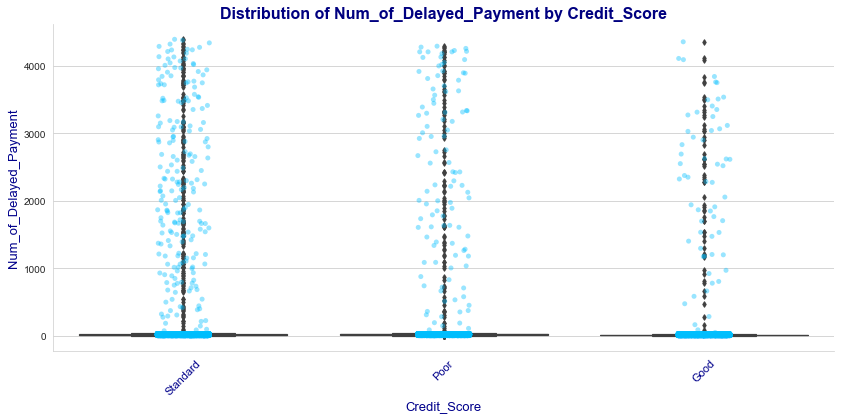

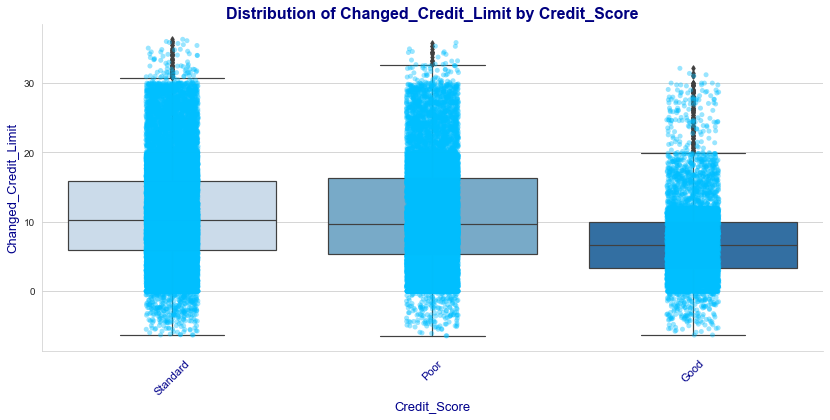

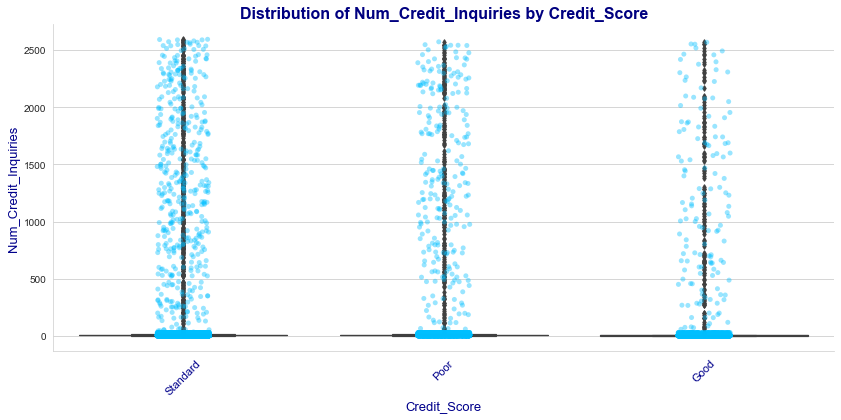

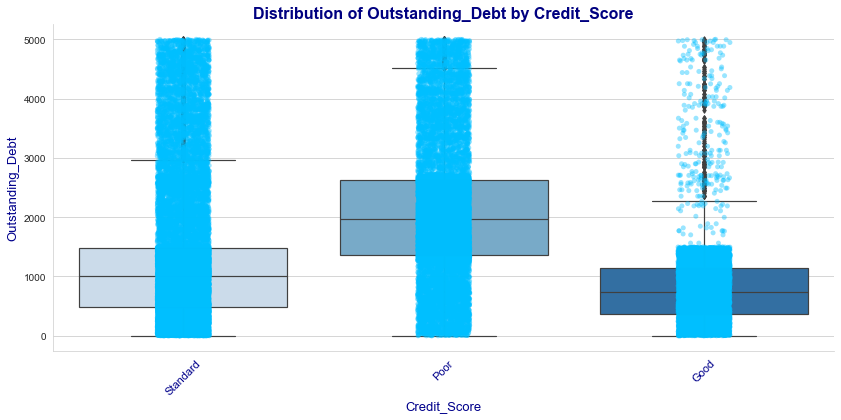

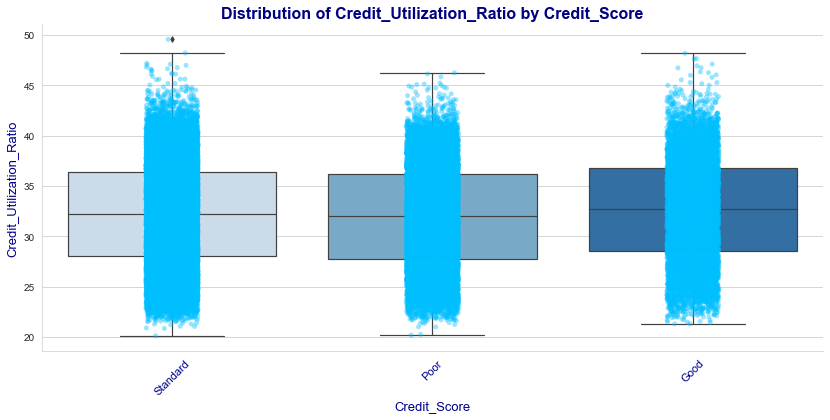

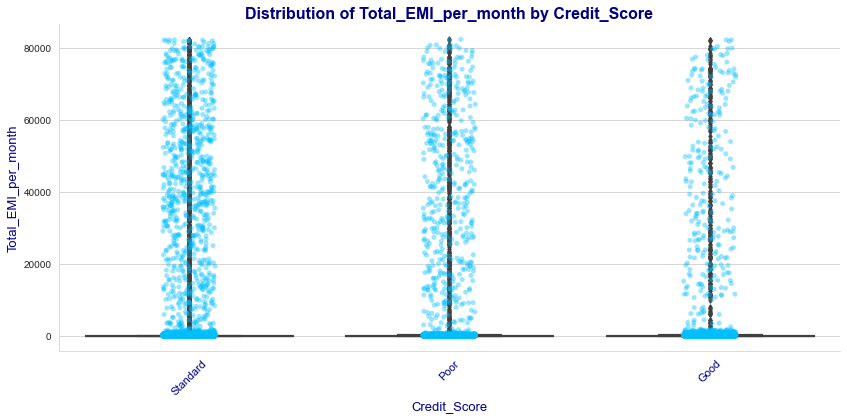

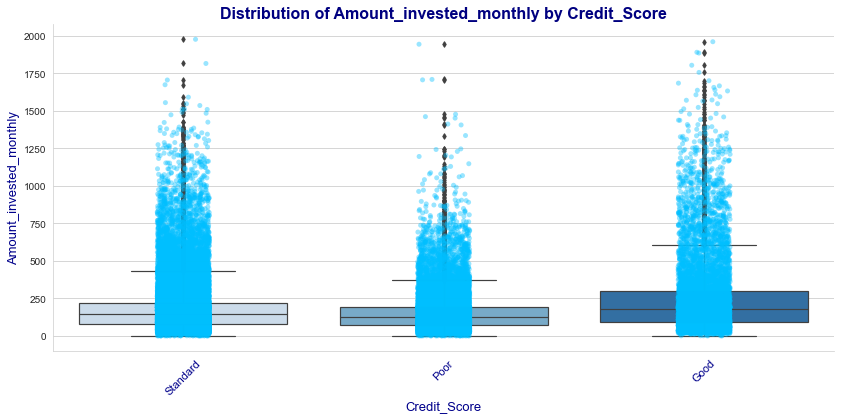

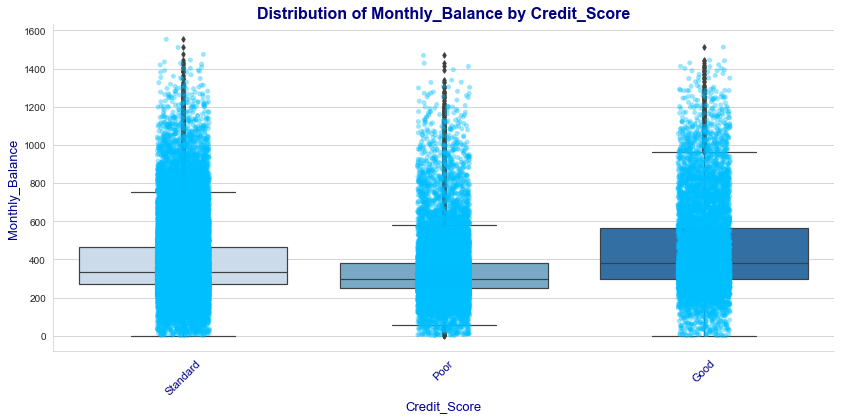

In [107]:
# Set a skyblue theme
sns.set_style("whitegrid")
sns.set_palette("Blues")   # use blue shades
plt.rcParams["axes.edgecolor"] = "lightgray"
plt.rcParams["axes.linewidth"] = 0.8

for col in numeric_columns:
    plt.figure(figsize=(14, 6))
    
    # Skyblue boxplot
    sns.boxplot(
        x='Credit_Score', 
        y=col, 
        data=ls_df_droped_new, 
        palette="Blues", 
        fliersize=4,   # size of outlier dots
        linewidth=1.2  # border width
    )
    
    # Overlay swarmplot for better visibility of data points
    sns.stripplot(
        x='Credit_Score', 
        y=col, 
        data=ls_df_droped_new, 
        color="deepskyblue", 
        alpha=0.4, 
        jitter=True
    )
    
    # Titles & labels
    plt.title(f"Distribution of {col} by Credit_Score", fontsize=16, fontweight='bold', color="navy")
    plt.xticks(rotation=45, fontsize=11, color="darkblue")
    plt.xlabel('Credit_Score', fontsize=13, color="darkblue")
    plt.ylabel(col, fontsize=13, color="darkblue")
    
    # Remove top & right spines for clean look
    sns.despine()
    
    plt.show()


If you look at above chart you will observe that we have some outlier in Age column which can be ingore and in almost all of the columns value  greatly  differ from the mean.

<Figure size 1008x432 with 0 Axes>

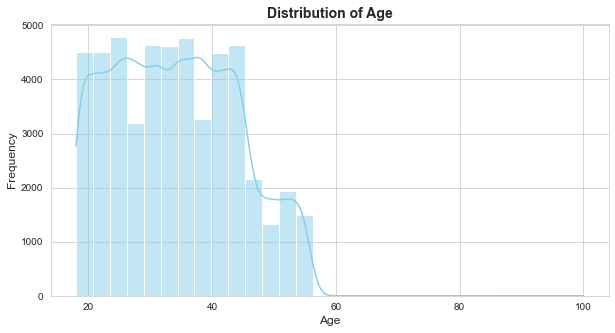

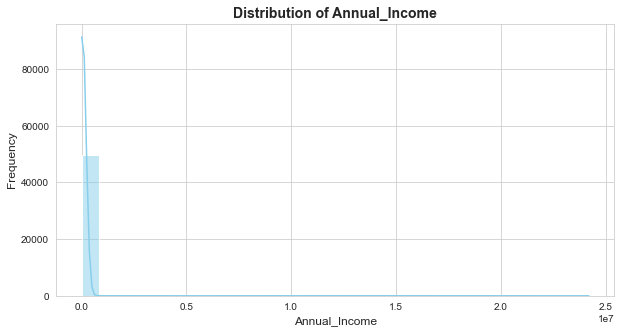

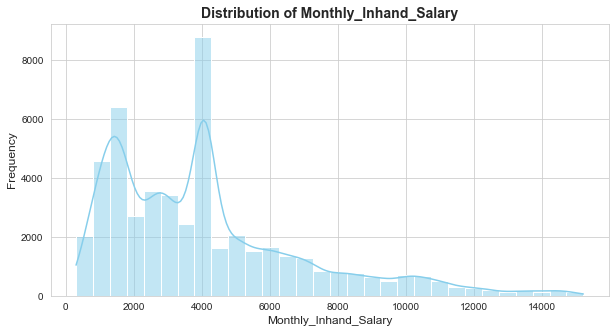

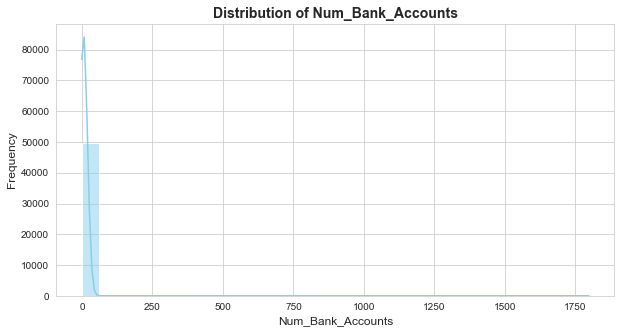

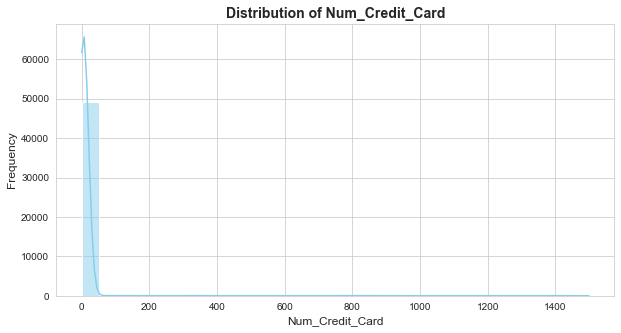

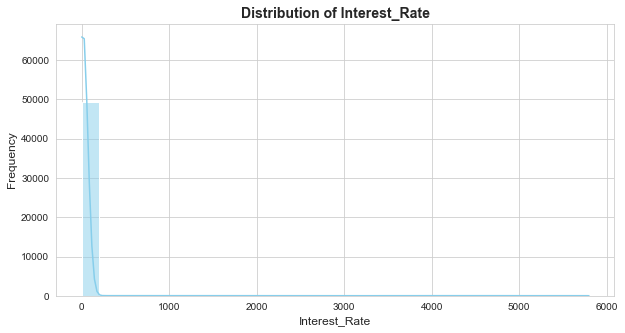

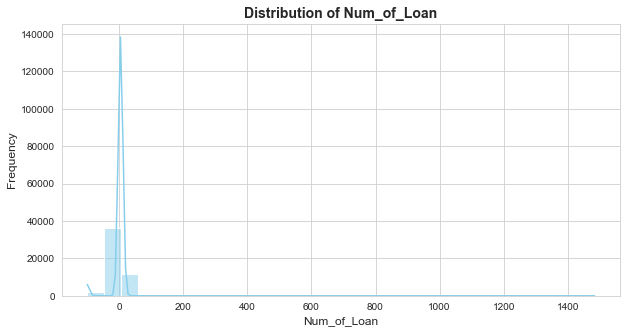

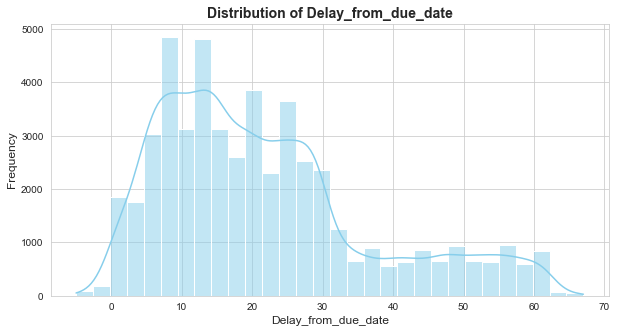

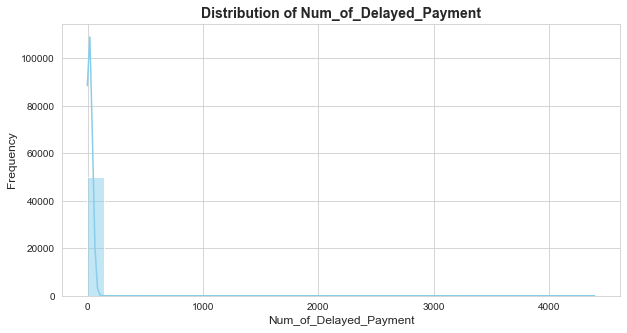

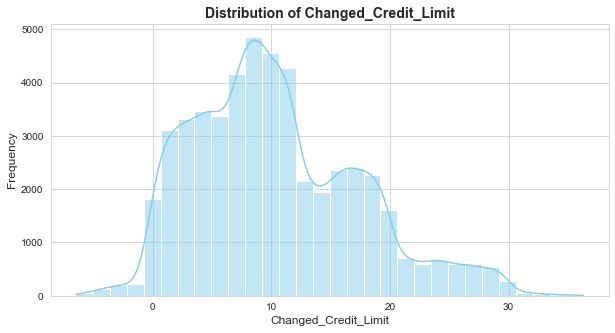

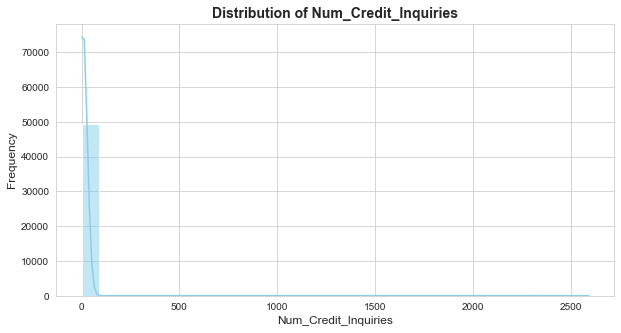

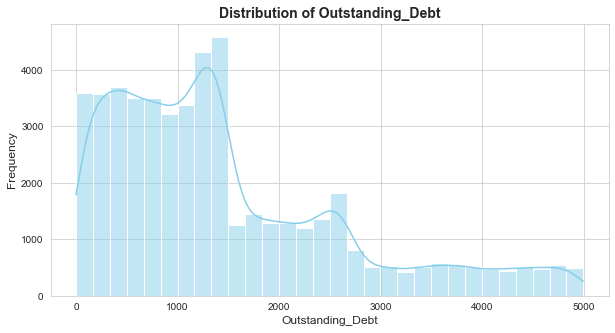

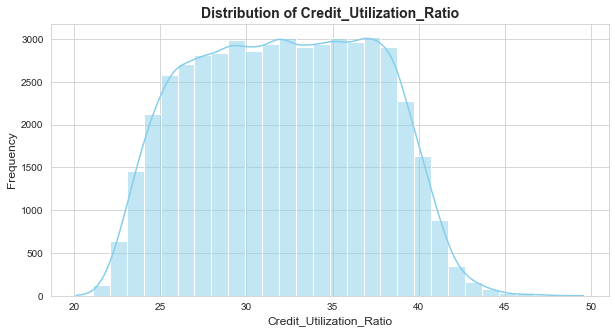

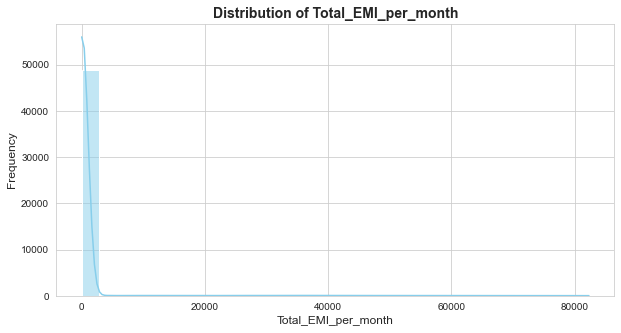

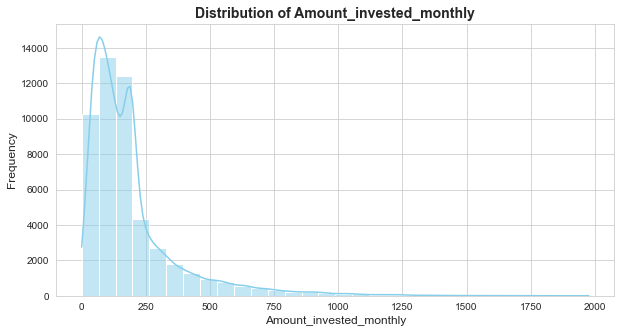

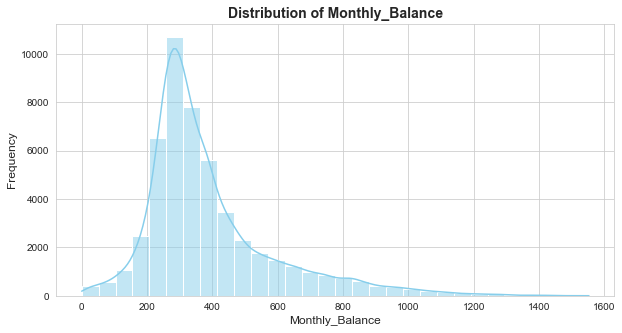

In [104]:
sns.set_style("whitegrid")

# set figure size for better readability
plt.figure(figsize=(14, 6))

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(ls_df_droped_new[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  

In above chart we can see that all value are in realastic range.

- Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`? 

In [120]:
sum(((ls_df_droped_new['Monthly_Inhand_Salary'] - (ls_df_droped_new['Amount_invested_monthly'] + ls_df_droped_new['Total_EMI_per_month'])== ls_df_droped_new['Monthly_Balance'])))

0

As we can see non of the monthly balance is mathching it means sometimes monthly Balance can be highed than 'income - (invest + emi)' or sometimes low as we can see below 

In [121]:
sum(((ls_df_droped_new['Monthly_Inhand_Salary'] - (ls_df_droped_new['Amount_invested_monthly'] + ls_df_droped_new['Total_EMI_per_month'])> ls_df_droped_new['Monthly_Balance'])))

48769

In [108]:
ls_df_droped_new.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

- Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  

In [123]:
ls_df_droped_new[object_columns].value_counts()

Month     Occupation     Type_of_Loan                                                                                                                                                  Credit_Mix  Credit_History_Age      Payment_of_Min_Amount  Payment_Behaviour                 Credit_Score
April     Scientist      Student Loan                                                                                                                                                  Good        26 Years and 2 Months   No                     High_spent_Small_value_payments   Standard        2
June      Accountant     Mortgage Loan                                                                                                                                                 Good        25 Years and 10 Months  No                     Low_spent_Medium_value_payments   Standard        2
March     Musician       Payday Loan                                                                                       

As you can see above , we did not found any unexpected category

### 🔹 Univariate Analysis (Single Feature Insights)
- What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  
- What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  
- How is **Annual_Income** distributed? Is it skewed?  
- What is the most common **Occupation** type among applicants?  
- What are the most frequent loan types in **Type_of_Loan**?  
- How does **Credit_History_Age** vary across customers?  


- What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  

Class Distribution (Counts):
 Standard    26554
Poor        15185
Good         8594
Name: Credit_Score, dtype: int64

Class Distribution (Percentage):
 Standard    52.76
Poor        30.17
Good        17.07
Name: Credit_Score, dtype: float64


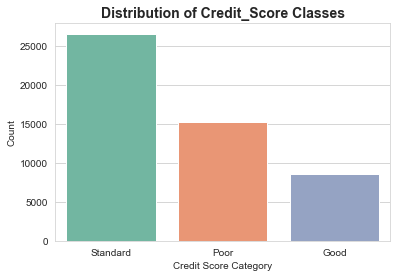

In [124]:
score_counts = ls_df_droped_new['Credit_Score'].value_counts()
score_percent = ls_df_droped_new['Credit_Score'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):\n", score_counts)
print("\nClass Distribution (Percentage):\n", score_percent.round(2))

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=ls_df_droped_new, palette="Set2")
plt.title("Distribution of Credit_Score Classes", fontsize=14, fontweight='bold')
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.show()

- What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  

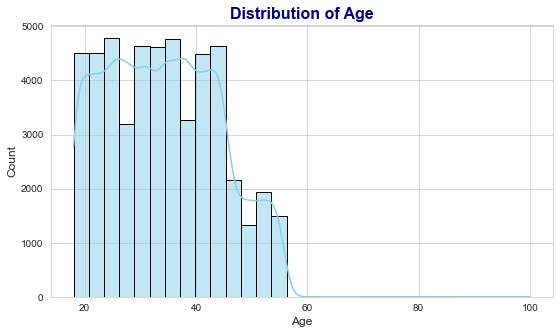

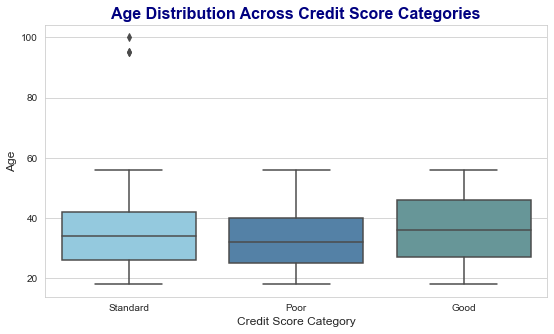

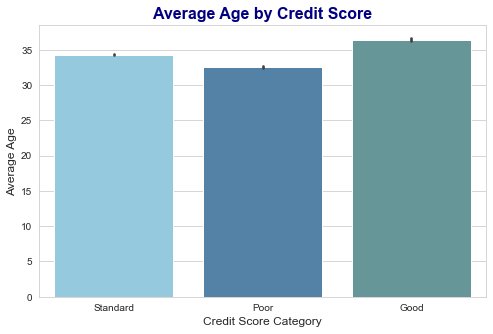

In [125]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"   # skyblue hex color

# 1. Distribution of Age
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Age'], bins=30, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Age", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Age distribution by Credit Score
plt.figure(figsize=(9,5))
sns.boxplot(x="Credit_Score", y="Age", data=ls_df_droped_new, palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Age Distribution Across Credit Score Categories", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# 3. Average Age by Credit Score
plt.figure(figsize=(8,5))
sns.barplot(x="Credit_Score", y="Age", data=ls_df_droped_new, 
            estimator=lambda x: sum(x)/len(x),
            palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Average Age by Credit Score", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.show()


 - How is **Annual_Income** distributed? Is it skewed?  


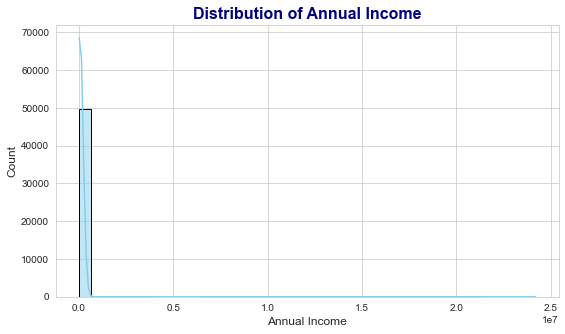

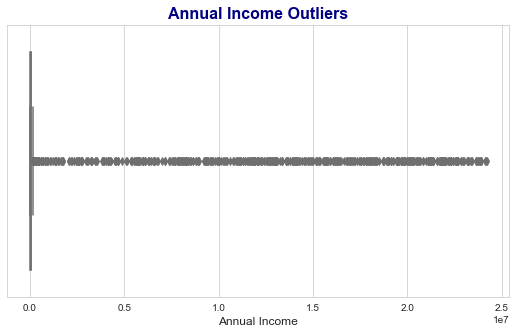

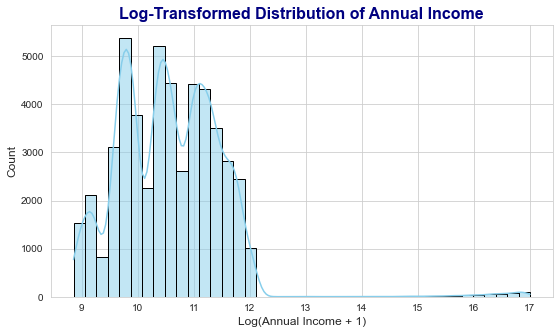

In [126]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Histogram with KDE
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Annual_Income'], bins=40, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Annual Income", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Boxplot to detect outliers
plt.figure(figsize=(9,5))
sns.boxplot(x=ls_df_droped_new['Annual_Income'], color=skyblue)
plt.title("Annual Income Outliers", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Annual Income", fontsize=12)
plt.show()

# 3. Log-transformed distribution (for skewness check)
plt.figure(figsize=(9,5))
sns.histplot(np.log1p(ls_df_droped_new['Annual_Income']), bins=40, kde=True, color=skyblue, edgecolor="black")
plt.title("Log-Transformed Distribution of Annual Income", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Log(Annual Income + 1)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

What is the most common **Occupation** type among applicants?  

Above are the top ten occupations

Occupation Counts:
 Lawyer           3622
Mechanic         3475
Architect        3460
Accountant       3435
Scientist        3424
Entrepreneur     3413
Engineer         3387
Doctor           3359
Teacher          3348
Media_Manager    3326
Developer        3323
Journalist       3268
Musician         3192
Manager          3152
Writer           3149
Name: Occupation, dtype: int64

Most common occupation: Lawyer (3622 applicants)


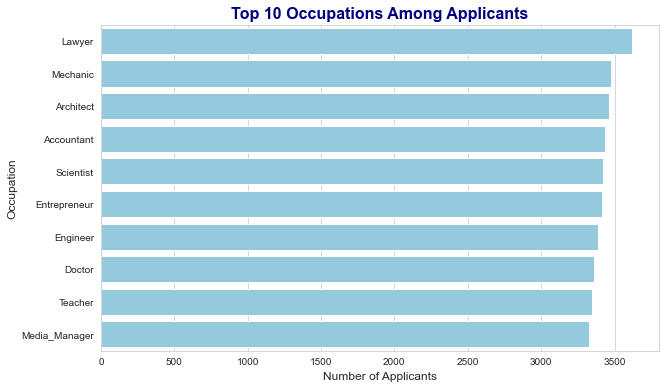

In [133]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Count values
occupation_counts = ls_df_droped_new['Occupation'].value_counts()
print("Occupation Counts:\n", occupation_counts)

# 2. Most common occupation
most_common = occupation_counts.idxmax()
print(f"\nMost common occupation: {most_common} ({occupation_counts.max()} applicants)")

# 3. Visualization (Top 10 occupations)
top_n = 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=occupation_counts[:top_n].values,
    y=occupation_counts[:top_n].index,
    palette=[skyblue]*top_n
)
plt.title(f"Top {top_n} Occupations Among Applicants", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.show()

Loan Type Counts:
 Not Specified                                                                                                               841
Student Loan                                                                                                                787
Credit-Builder Loan                                                                                                         782
Personal Loan                                                                                                               773
Debt Consolidation Loan                                                                                                     758
                                                                                                                           ... 
Payday Loan, Credit-Builder Loan, Debt Consolidation Loan, Auto Loan, Personal Loan, and Personal Loan                        1
Payday Loan, Student Loan, Auto Loan, and Debt Consolidation Loan                    

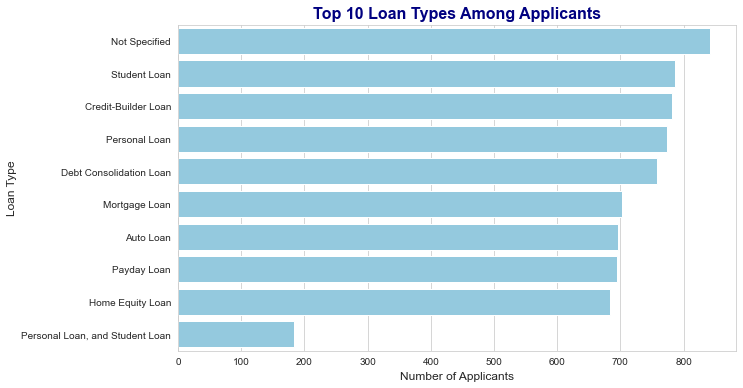

In [135]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Count values
loan_counts = ls_df_droped_new['Type_of_Loan'].value_counts()
print("Loan Type Counts:\n", loan_counts)

# 2. Most frequent loan type
most_frequent = loan_counts.idxmax()
print(f"\nMost frequent loan type: {most_frequent} ({loan_counts.max()} applicants)")

# 3. Visualization (Top 10 loan types)
top_n = 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=loan_counts[:top_n].values,
    y=loan_counts[:top_n].index,
    palette=[skyblue]*top_n
)
plt.title(f"Top {top_n} Loan Types Among Applicants", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Loan Type", fontsize=12)
plt.show()

In [152]:
import pandas as pd
import numpy as np

def convert_to_months(x):
    if pd.isnull(x):
        return np.nan
    try:
        years = int(x.split("Years")[0].strip())
        months = int(x.split("and")[1].replace("Months","").strip())
        total_months = years * 12 + months
        return total_months
    except:
        return np.nan

ls_df_droped_new['Credit_History_Months'] = ls_df_droped_new['Credit_History_Age'].apply(convert_to_months)


In [153]:
ls_df_droped_new['Credit_History_Months']

1         247
5         268
7         288
9          80
10        260
         ... 
149985    210
149986    386
149987    288
149991    103
149993    161
Name: Credit_History_Months, Length: 50333, dtype: int64

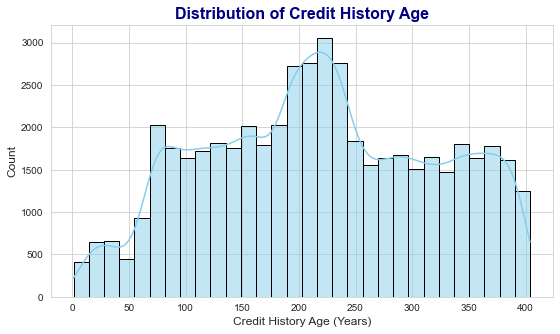

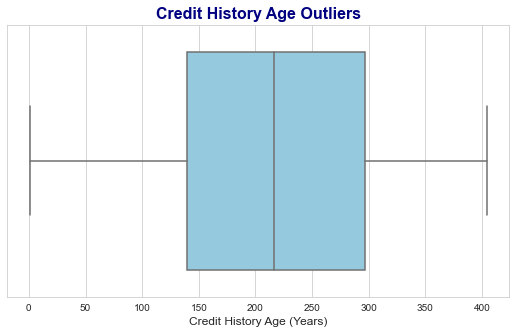

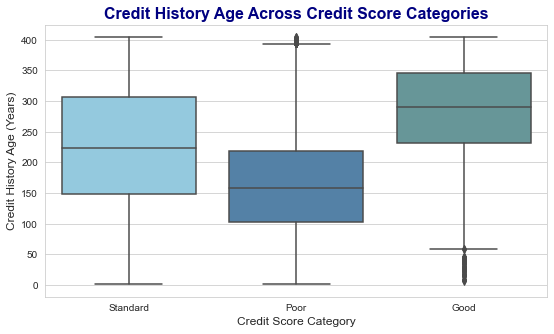

In [154]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

age_wise = ls_df_droped_new.groupby('Credit_History_Age').agg(count=('Credit_History_Age', 'count')).sort_values('count', ascending=False).reset_index()


# 1. Distribution histogram with KDE
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Credit_History_Months'], bins=30, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Credit History Age", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit History Age (Years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Boxplot to detect outliers
plt.figure(figsize=(9,5))
sns.boxplot(x=ls_df_droped_new['Credit_History_Months'], color=skyblue)
plt.title("Credit History Age Outliers", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit History Age (Years)", fontsize=12)
plt.show()

# 3. Optionally, compare with Credit_Score using boxplot
plt.figure(figsize=(9,5))
sns.boxplot(x='Credit_Score', y='Credit_History_Months', data=ls_df_droped_new, palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Credit History Age Across Credit Score Categories", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Credit History Age (Years)", fontsize=12)
plt.show()